In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import rocketpy

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

plt.style.use("seaborn-v0_8-dark-palette")

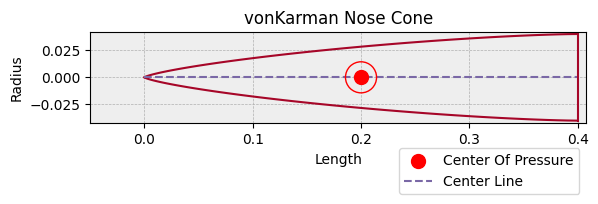

In [3]:

Aerotech_L1265WS = SolidMotor(
    thrust_source="rocketData/Regulus/AeroTech_L1256WS.eng",
    dry_mass=1.792,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
Cesaroni_L1355 = SolidMotor(
    thrust_source="rocketData/Regulus/Cesaroni_4025L1355-P.eng",
    dry_mass=1.792,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=4,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.310,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=2.97,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Regulus = Rocket(
    radius = 80/2000,
    mass = 7.67,
    inertia = (3.239, 3.239, 0.0063),
    power_off_drag = "rocketData/Regulus/Regulus CD power off.csv",
    power_on_drag = "rocketData/Regulus/Regulus CD power off.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",

)
Regulus.add_motor(Cesaroni_L1355, position=-1.45)


nose_cone = Regulus.add_nose(
    length=0.40, kind="vonKarman", position=0.95
).draw()

fin_set = Regulus.add_trapezoidal_fins(
    n=4,
    root_chord=0.22,
    tip_chord=0.065,
    span=0.055,
    position=-1.19,
    cant_angle = 0.5,

    airfoil=None,
).draw


Main = Regulus.add_parachute(
    "Main",
    cd_s=0.76,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Regulus.add_parachute(
    "Drogue",
    cd_s=0.085,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


In [4]:
# Environment conditions
import datetime

env = Environment(latitude=55.432968, longitude=-5.700802, elevation=5)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time


env.set_atmospheric_model(type="Forecast", file="GFS")

In [5]:
# Flight
flight = Flight(
rocket= Regulus, 
environment=env, 
rail_length=3, 
inclination=90, 
heading=0
)

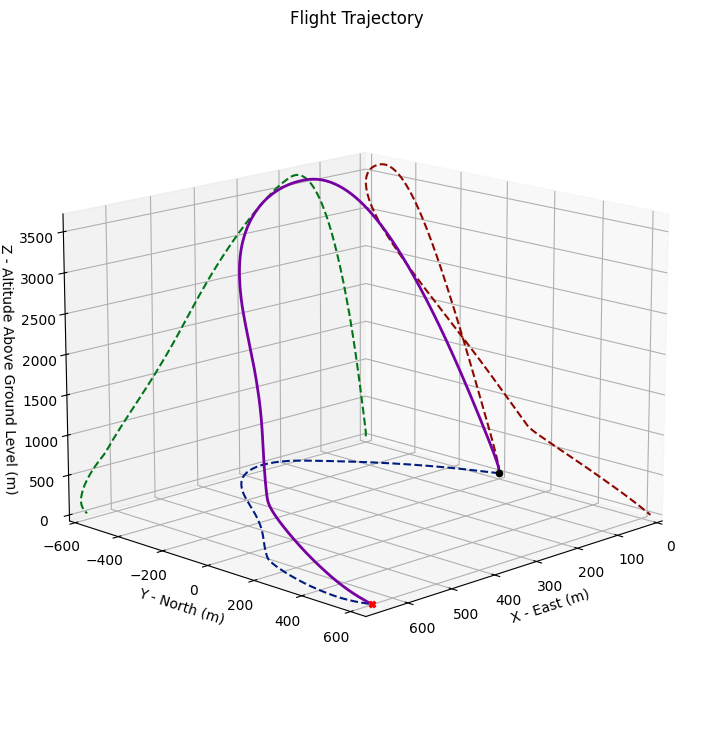

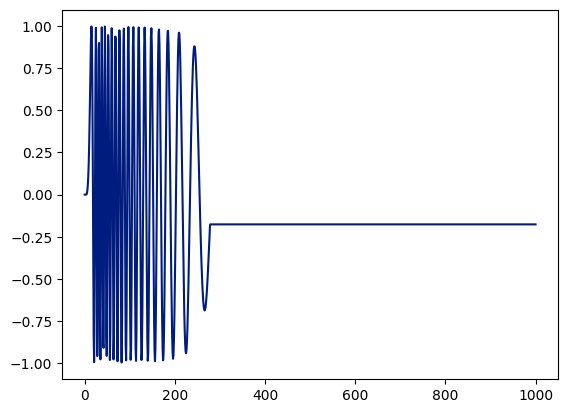

In [6]:
#Plotting

flight.plots.trajectory_3d()

points = [round(i * 0.1, 1) for i in range(0, int(100 / 0.1) + 1)]

plt.plot(flight.e3(points))


In [7]:
def get_gravity(altitude):
    g_0 = 9.80665  # Standard gravity at sea level in m/s^2
    R_e = 6371000  # Earth's radius in meters
    return g_0 * (R_e / (R_e + altitude))**2

def get_density(altitude):
    p_0 = 101325  # Standard sea level atmospheric pressure in Pascals
    M = 0.0289652  # Molar mass of dry air in kg/mol
    R = 8.31445  # Ideal gas constant in J/(mol*K)
    T_0 = 288.15  # Standard sea level temperature in Kelvin
    L = 0.0065  # Temperature lapse rate in K/m
    g = get_gravity(altitude)
    
    rho = (p_0 * M) / (R * T_0) * (1 - (L * altitude) / T_0)**(((-g * M) / (R * L)) - 1)
    return rho


# Assuming flight.vz(points) and flight.Az(points) return lists of velocities and areas respectively
Cb = [(get_density(z) * vz**2) / 2 * (A - get_gravity(z)) for z, vz, A in zip(flight.z(points), flight.vz(points), flight.az(points))]




plt.plot(points,flight.e4(points));


AttributeError: 'Flight' object has no attribute 'e4'

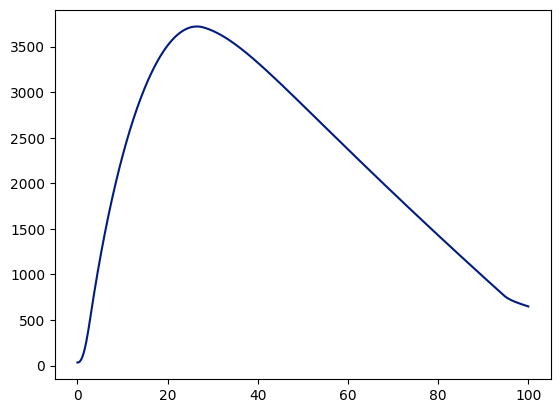

In [ ]:
plt.plot(points,flight.z(points));

Data exported to Regulus 100.0Hz.csv

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 33.49 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: 0.000 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 180.00° | Nutation θ: -0.00° | Precession ψ: -180.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 7.83 m/s
Lateral Surface Wind Speed: 2.47 m/s


Launch Rail

Launch Rail Length: 3  m
Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.336 s
Rail Departure Velocity: 26.939 m/s
Rail Departure Stability Margin: 3.907 c
Rail Departure Angle of Attack: 16.954°
Rail Departure Thrust-Weight Ratio: 13.576
Rail Departure Reynolds Number: 1.537e+05


Burn out State

Burn out time: 2.970 s
Altitude at burn out: 523.140 m (AGL)
Rocket velocity at burn out: 325.854 m/s
Freestream velocity at burn out: 327.241 m/s
Mach Number at burn 

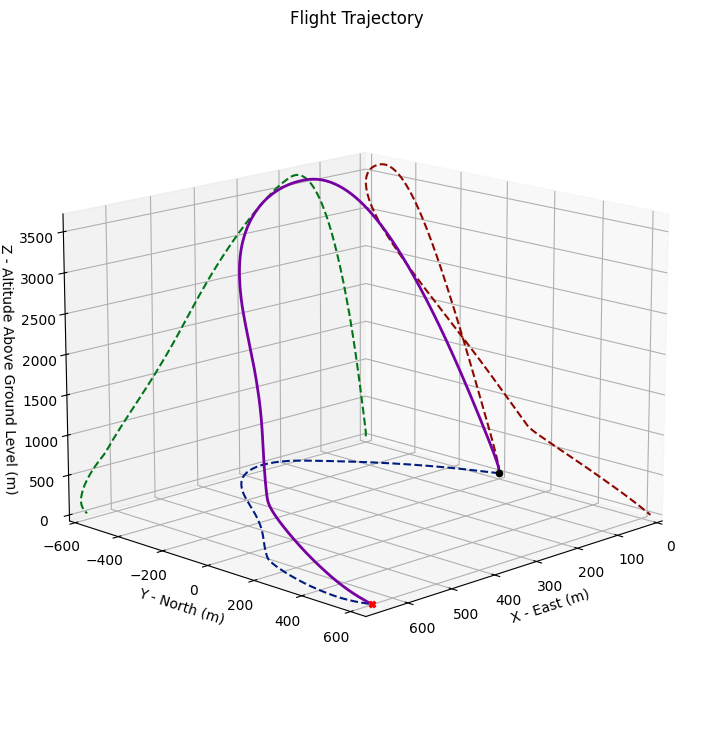



Trajectory Kinematic Plots



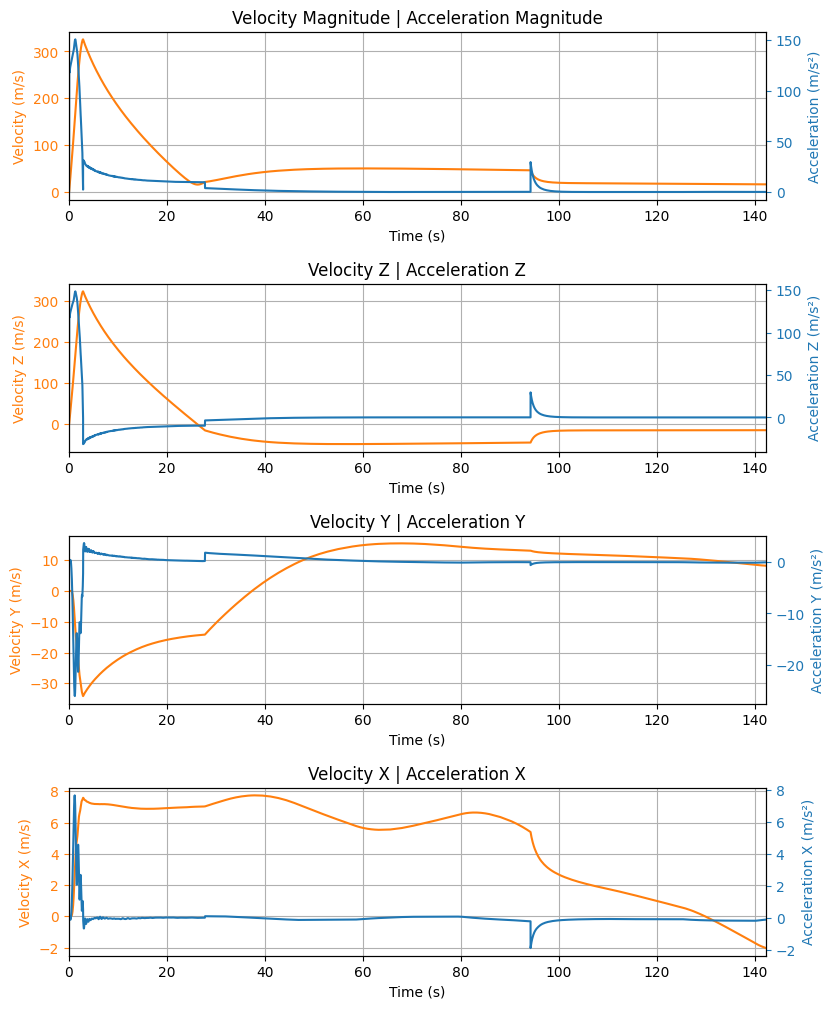



Angular Position Plots



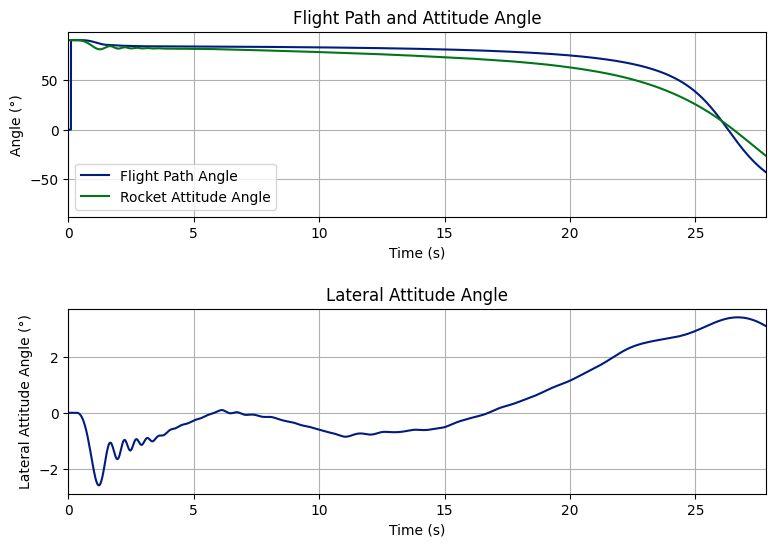



Path, Attitude and Lateral Attitude Angle plots



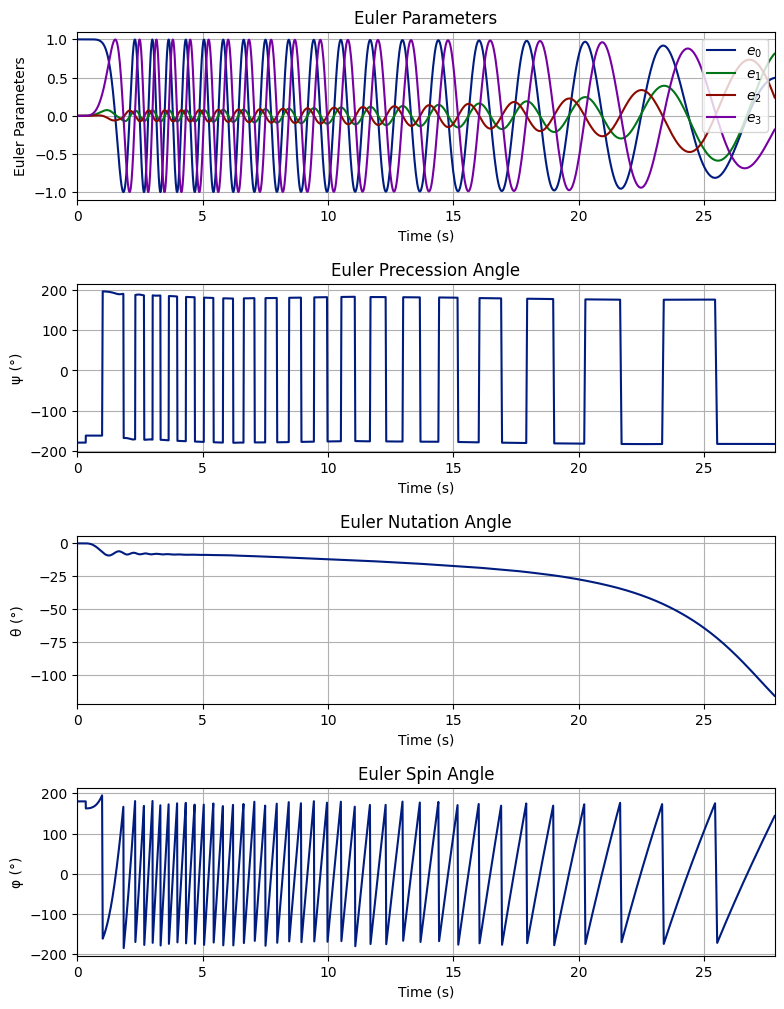



Trajectory Angular Velocity and Acceleration Plots



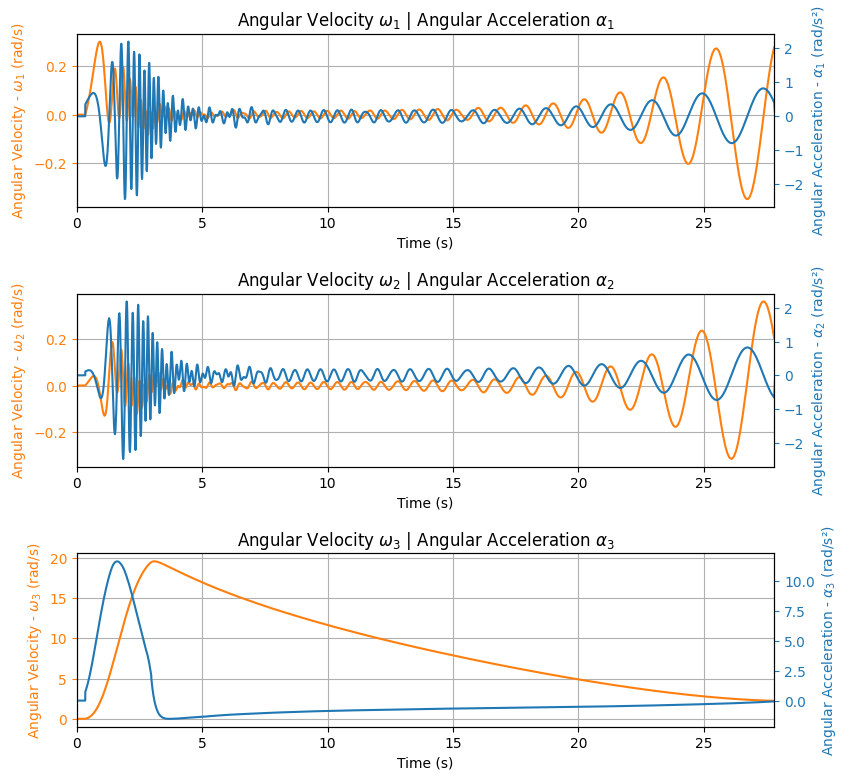



Aerodynamic Forces Plots



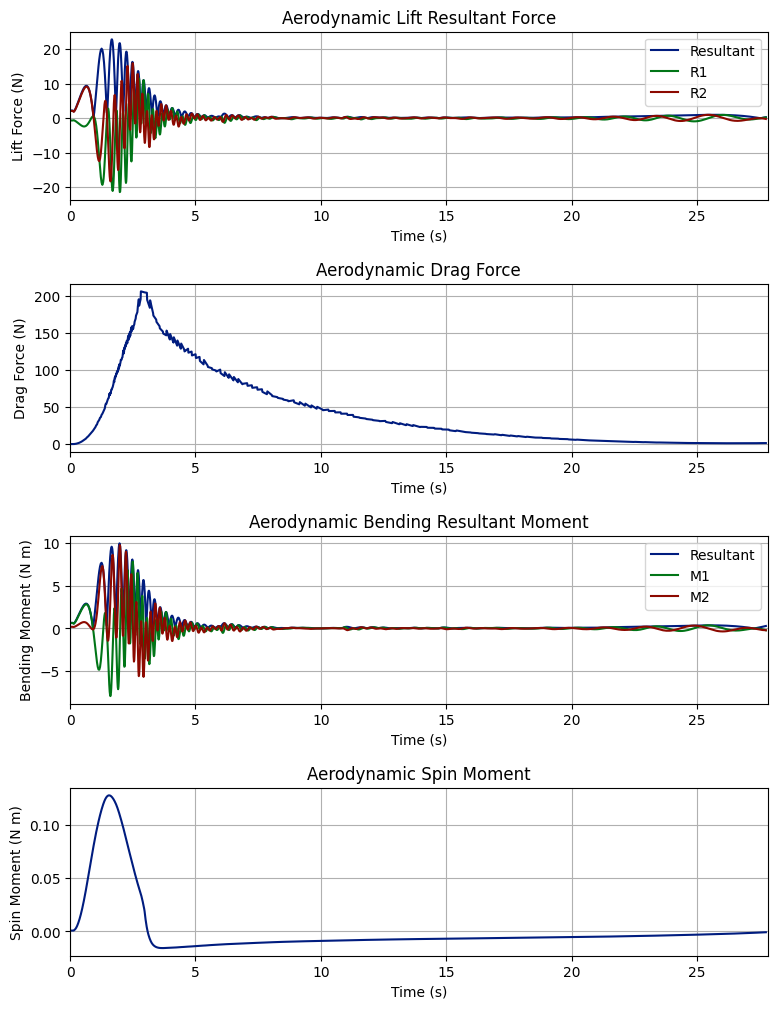



Rail Buttons Forces Plots

No rail buttons were defined. Skipping rail button plots.


Trajectory Energy Plots



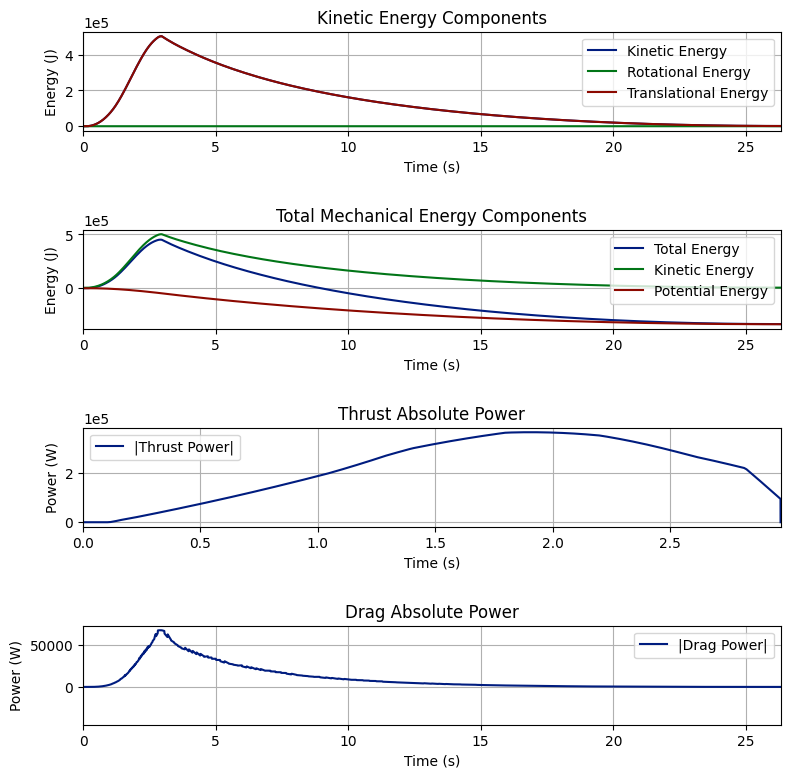



Trajectory Fluid Mechanics Plots



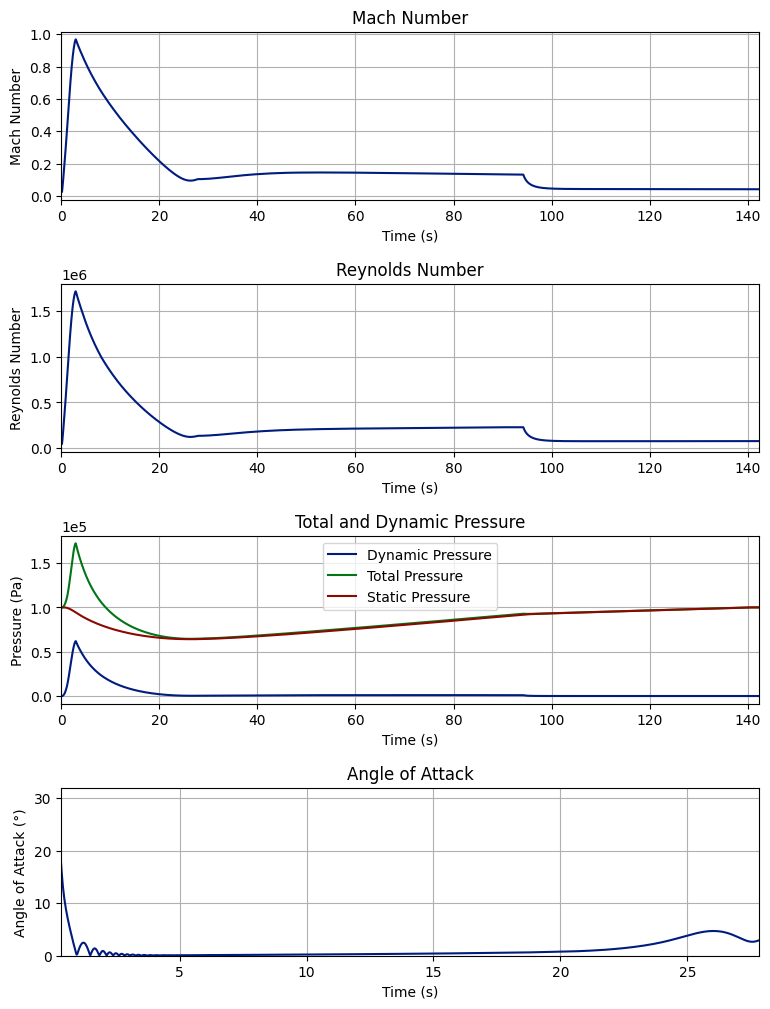



Trajectory Stability and Control Plots



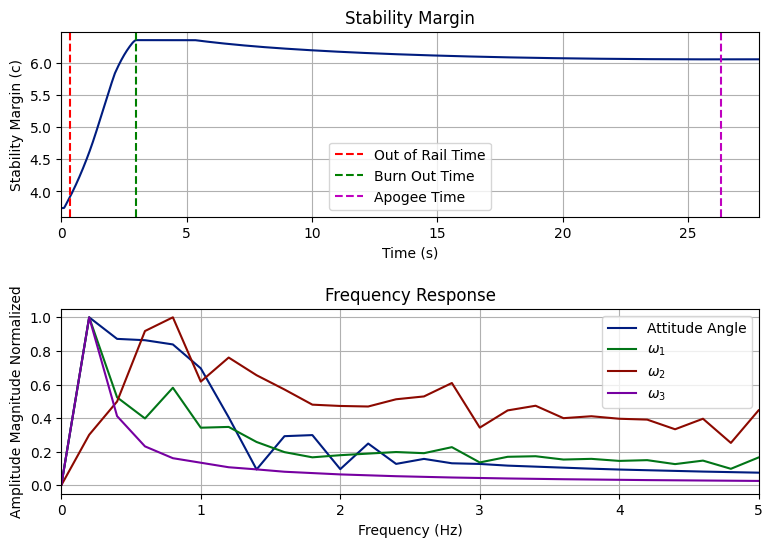



Rocket and Parachute Pressure Plots



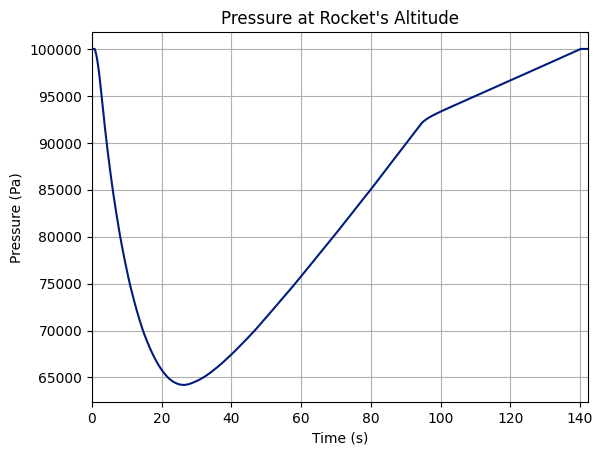


Parachute:  Main


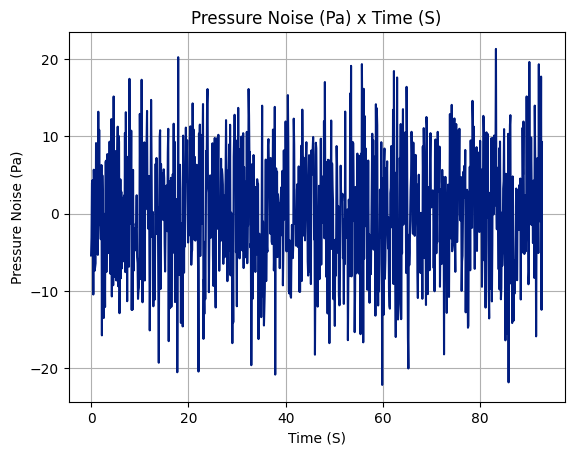

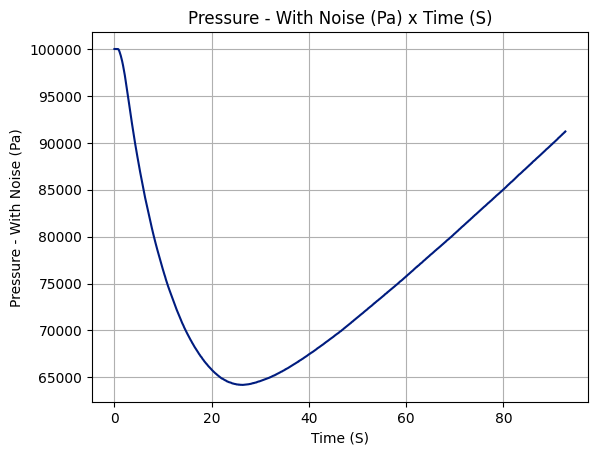

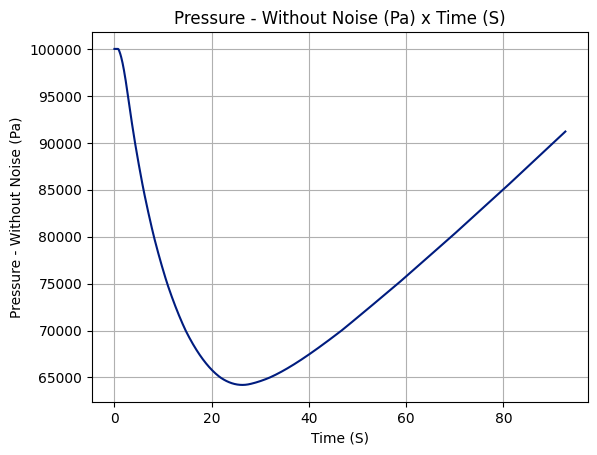


Parachute:  Drogue


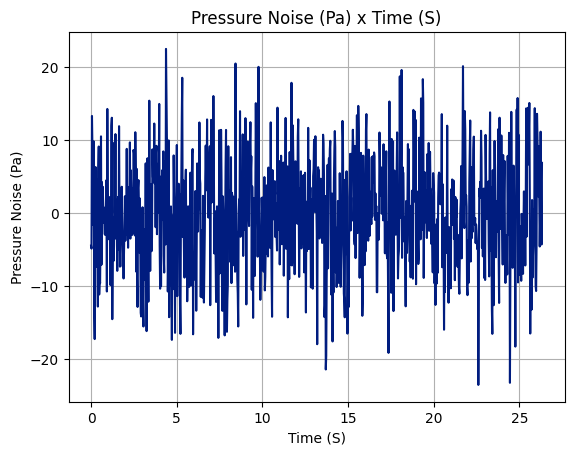

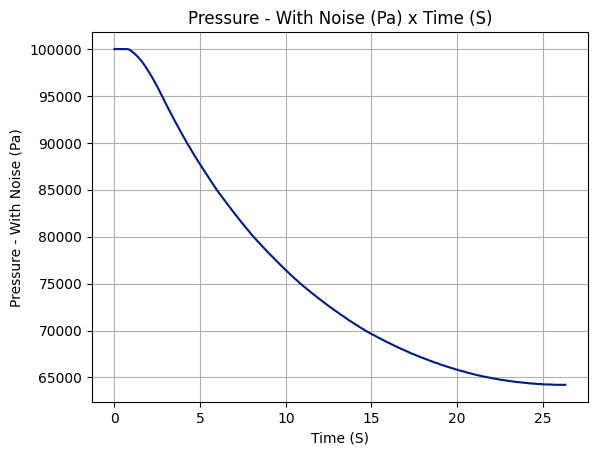

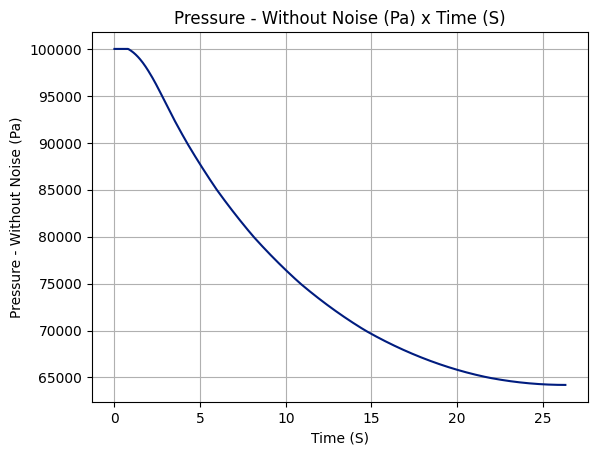

In [8]:
#Function for exporting flight instances as CSV
import csv
import numpy as np

# Assuming `flight` is your Flight object instance and it now also includes:
# - Flight.ax(t), Flight.ay(t), Flight.az(t), Flight.alpha1(t), Flight.alpha2(t), and Flight.alpha3(t)

# Define the range of time and step size for which you want to export data
start_time = 0
end_time = 100  # Example: 100 seconds after launch
time_step = 0.01  # Example: Evaluate every second

# Define the CSV file name
csv_file_name = 'Regulus ' + str(1/time_step) + "Hz.csv"

# Open a new CSV file for writing
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow([
        'Time', 'X', 'Y', 'Z', 'VX', 'VY', 'VZ',
        'Euler 0', 'Euler 1', 'Euler 2', 'Euler 3',
        'Omega 1', 'Omega 2', 'Omega 3',
        'Latitude', 'Longitude', 'Inclination', 'Heading',
        'Ax', 'Ay', 'Az', 'Alpha 1', 'Alpha 2', 'Alpha 3'
    ])
    
    # Iterate over each time step and write data rows
    for t in np.arange(start_time, end_time + time_step, time_step):
        writer.writerow([
            t,
            flight.x(t),  # Assuming x is a function of time
            flight.y(t),  # Assuming y is a function of time
            flight.z(t),
            flight.vx(t),
            flight.vy(t),
            flight.vz(t),
            flight.e0(t),
            flight.e1(t),
            flight.e2(t),
            flight.e3(t),
            flight.w1(t),
            flight.w2(t),
            flight.w3(t),
            flight.latitude(t),
            flight.longitude(t),
            flight.inclination,  # Static value
            flight.heading,  # Static value
            flight.ax(t),  # Assuming ax is a function of time
            flight.ay(t),  # Assuming ay is a function of time
            flight.az(t),  # Assuming az is a function of time
            flight.alpha1(t),  # Assuming alpha1 is a function of time
            flight.alpha2(t),  # Assuming alpha2 is a function of time
            flight.alpha3(t)  # Assuming alpha3 is a function of time
        ])

print(f'Data exported to {csv_file_name}')

flight.all_info()
